# Pivot tables

Pivot tables can be created using the function **pivot_table()**. Essential parameters are
- **values** -- variables to be calculated
- **inxdex** -- row variables
- **columns** -- column variables
- **aggfunc** -- methods of calculation, by default means are calculated

A skilful user of **groupby()** function can perform the same tables as with pivot_table(). However, in most cases the function pivot_table() gives us an easier way.

If numbers of occurrencies are calculated, it's worth use the function **crosstab()** instead of pivot_table() as it calculates occurrencies by default. 

In [1]:
### Bring the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Open the data. Here we consider happiness in different years.

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/happy.xlsx')

df.head()

,Region,Country,Year,Score
0,Western Europe,Switzerland,2015,7.587
1,Western Europe,Iceland,2015,7.561
2,Western Europe,Denmark,2015,7.527
3,Western Europe,Norway,2015,7.522
4,North America,Canada,2015,7.427


In [3]:
### Create a pivot table with means of happiness scores as values and  years as rows

df.pivot_table(values = 'Score', index = 'Year')

,Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


In [6]:
### Consider only the year 2019 and view regions as rows

### Also order the result in descending order by the means

df[df['Year'] == 2019].pivot_table(values = 'Score', 
                index = 'Region').sort_values(by = 'Score', ascending = False)

,Score
Region,
Australia and New Zealand,7.267500
North America,7.085000
Western Europe,6.898400
Latin America and Caribbean,5.942550
Eastern Asia,5.688833
Central and Eastern Europe,5.571786
Southeastern Asia,5.273667
Middle East and Northern Africa,5.237000
Southern Asia,4.526857


Text(0.5, 0, 'Mean of Happiness Score')

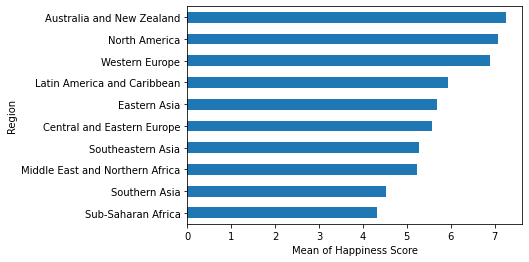

In [8]:
### Use graphics and express the same as bars

df[df['Year'] == 2019].pivot_table(values = 'Score', index = 'Region')\
                .sort_values(by = 'Score').plot.barh(legend = False)

plt.xlabel('Mean of Happiness Score')

In [9]:
### There can be several variables in rows

df.pivot_table(values = 'Score', index = ['Region', 'Year'])

Score
Region                          Year          
Australia and New Zealand       2015  7.285000
                                2016  7.323500
                                2017  7.299000
                                2018  7.298000
                                2019  7.267500
Central and Eastern Europe      2015  5.332931
                                2016  5.370690
                                2017  5.409931
                                2018  5.463966
                                2019  5.571786
Eastern Asia                    2015  5.626167
                                2016  5.624167
                                2017  5.496500
                                2018  5.672000
                                2019  5.688833
Latin America and Caribbean     2015  6.144682
                                2016  6.065773
                                2017  5.957905
                                2018  5.937750
                                2019  5.942550
Middle East and Northern Africa 2015  5.406900
                                2016  5.386053
                                2017  5.369684
                                2018  5.282737
                                2019  5.237000
North America                   2015  7.273000
                                2016  7.254000
                                2017  7.154500
                                2018  7.107000
                                2019  7.085000
Southeastern Asia               2015  5.317444
                                2016  5.338889
                                2017  5.444875
                                2018  5.313444
                                2019  5.273667
Southern Asia                   2015  4.580857
                                2016  4.563286
                                2017  4.628429
                                2018  4.603857
                                2019  4.526857
Sub-Saharan Africa              2015  4.202800
                                2016  4.067088
                                2017  4.084722
                                2018  4.192472
                                2019  4.314611
Western Europe                  2015  6.689619
                                2016  6.685667
                                2017  6.703714
                                2018  6.829100
                                2019  6.898400

In [10]:
### Next place years in columns

### And finally polish the result using two decimals

df.pivot_table(values = 'Score', index = 'Region',
              columns = 'Year').style.format('{:.2f}')

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.29,7.32,7.30,7.30,7.27
Central and Eastern Europe,5.33,5.37,5.41,5.46,5.57
Eastern Asia,5.63,5.62,5.50,5.67,5.69
Latin America and Caribbean,6.14,6.07,5.96,5.94,5.94
Middle East and Northern Africa,5.41,5.39,5.37,5.28,5.24
North America,7.27,7.25,7.15,7.11,7.08
Southeastern Asia,5.32,5.34,5.44,5.31,5.27
Southern Asia,4.58,4.56,4.63,4.60,4.53
Sub-Saharan Africa,4.20,4.07,4.08,4.19,4.31


In [14]:
### The parameter aggfunc defines the calculation methods of variables to be calculated

df1 = df[df['Year'] == 2019].pivot_table(values = 'Score', 
                index = 'Region', aggfunc = ['median', 'min', 'max', 'count'])

### Polish the headers

df1.columns = ['Median', 'Min', 'Max', 'Count']

### use two decimals except none with count

df1.style.format({'Median' : '{:.2f}', 'Min' : '{:.2f}', 'Max' : '{:.2f}', 'Count' : '{:.0f}'})

,Median,Min,Max,Count
Region,,,,
Australia and New Zealand,7.27,7.23,7.31,2
Central and Eastern Europe,5.57,4.33,6.85,28
Eastern Asia,5.66,5.19,6.45,6
Latin America and Caribbean,6.10,3.60,7.17,20
Middle East and Northern Africa,5.21,3.38,7.14,19
North America,7.08,6.89,7.28,2
Southeastern Asia,5.19,4.36,6.26,9
Southern Asia,4.46,3.20,5.65,7
Sub-Saharan Africa,4.38,3.08,5.89,36


In [16]:
### Continue the previous example and restrict to regions where there is the word 'Asia' in th ename

df2 = df1[df1.index.str.contains('Asia')]

### Use the similar style formats as inthe previous example

df2.style.format({'Median' : '{:.2f}', 'Min' : '{:.2f}', 'Max' : '{:.2f}', 'Count' : '{:.0f}'})

,Median,Min,Max,Count
Region,,,,
Eastern Asia,5.66,5.19,6.45,6
Southeastern Asia,5.19,4.36,6.26,9
Southern Asia,4.46,3.20,5.65,7


### Further information

<UL>
<LI>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html</a>
</LI>
</UL>

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>